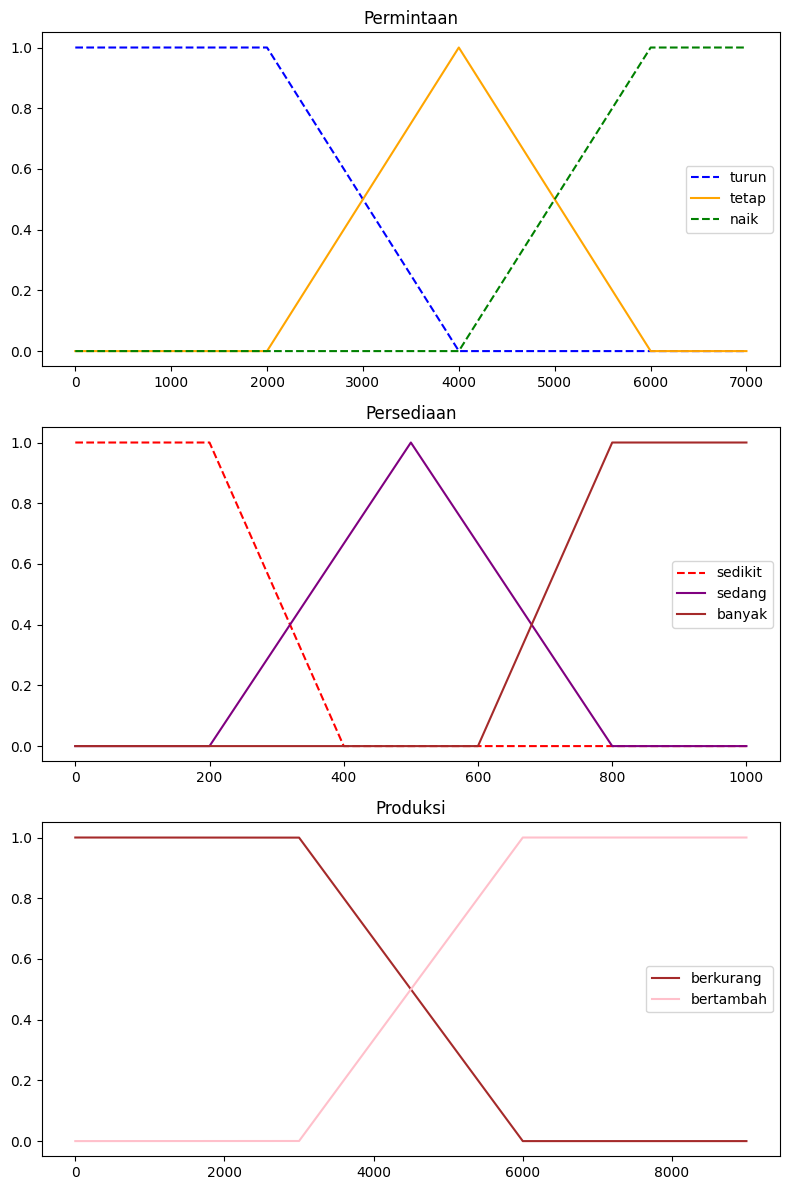

Output Produksi (Defuzzifikasi): 3000.0


In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 1. Definisi variabel fuzzifikasi
# Variabel Permintaan
x_permintaan = np.arange(0, 7001, 1)
permintaan_turun = fuzz.trapmf(x_permintaan, [0, 0, 2000, 4000])
permintaan_tetap = fuzz.trimf(x_permintaan, [2000, 4000, 6000])
permintaan_naik = fuzz.trapmf(x_permintaan, [4000, 6000, 7000, 7000])

# Variabel Persediaan
x_persediaan = np.arange(0, 1001, 1)
persediaan_sedikit = fuzz.trapmf(x_persediaan, [0, 0, 200, 400])
persediaan_sedang = fuzz.trimf(x_persediaan, [200, 500, 800])
persediaan_banyak = fuzz.trapmf(x_persediaan, [600, 800, 1000, 1000])

# Variabel Produksi
x_produksi = np.arange(0, 9001, 1)
produksi_berkurang = fuzz.trapmf(x_produksi, [0, 0, 3000, 6000])
produksi_bertambah = fuzz.trapmf(x_produksi, [3000, 6000, 9000, 9000])

# 2. Plot fungsi keanggotaan
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 12))

# Plot Permintaan
ax0.plot(x_permintaan, permintaan_turun, 'b--', label='turun')
ax0.plot(x_permintaan, permintaan_tetap, 'orange', label='tetap')
ax0.plot(x_permintaan, permintaan_naik, 'g--', label='naik')
ax0.set_title('Permintaan')
ax0.legend()

# Plot Persediaan
ax1.plot(x_persediaan, persediaan_sedikit, 'r--', label='sedikit')
ax1.plot(x_persediaan, persediaan_sedang, 'purple', label='sedang')
ax1.plot(x_persediaan, persediaan_banyak, 'brown', label='banyak')
ax1.set_title('Persediaan')
ax1.legend()

# Plot Produksi
ax2.plot(x_produksi, produksi_berkurang, 'brown', label='berkurang')
ax2.plot(x_produksi, produksi_bertambah, 'pink', label='bertambah')
ax2.set_title('Produksi')
ax2.legend()

plt.tight_layout()
plt.show()

# 3. Implementasi inferensi fuzzy (contoh sederhana)
def tsukamoto(permintaan, persediaan):
    # Fuzzifikasi
    permintaan_turun_degree = fuzz.interp_membership(x_permintaan, permintaan_turun, permintaan)
    permintaan_tetap_degree = fuzz.interp_membership(x_permintaan, permintaan_tetap, permintaan)
    permintaan_naik_degree = fuzz.interp_membership(x_permintaan, permintaan_naik, permintaan)

    persediaan_sedikit_degree = fuzz.interp_membership(x_persediaan, persediaan_sedikit, persediaan)
    persediaan_sedang_degree = fuzz.interp_membership(x_persediaan, persediaan_sedang, persediaan)
    persediaan_banyak_degree = fuzz.interp_membership(x_persediaan, persediaan_banyak, persediaan)

    # Aturan (rule base)
    # Contoh beberapa aturan dari gambar
    r1 = min(permintaan_turun_degree, persediaan_sedikit_degree)
    r2 = min(permintaan_turun_degree, persediaan_sedang_degree)
    r3 = min(permintaan_naik_degree, persediaan_banyak_degree)

    # Output aturan (z)
    z1 = 9000  # Bertambah
    z2 = 3000  # Berkurang
    z3 = 3000  # Berkurang

    # Agregasi
    numerator = (r1 * z1) + (r2 * z2) + (r3 * z3)
    denominator = r1 + r2 + r3

    if denominator == 0:
        return 0
    return numerator / denominator

# Contoh perhitungan manual
permintaan_sample = 3000
persediaan_sample = 400
output = tsukamoto(permintaan_sample, persediaan_sample)
print(f"Output Produksi (Defuzzifikasi): {output}")